# Aula 29 - Exercícios

## 0. Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Data
df = pd.read_csv('datasets/kc_house_data.csv')

In [3]:
df.shape

(21613, 21)

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.columns.to_list()

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

## 1. Qual a média de compra dos imóveis por "Nível"?

- Nível 0 -> Preço entre `$ 0 e $ 321950` 
- Nível 1 -> Preço entre `$ 321950 e $ 450000` 
- Nível 2 -> Preço entre `$ 450000 e $ 645000` 
- Nível 3 -> Preço acima de  `$ 645000`


- Aqui, temos primeiro que criar a variável `nivel` que vai depender do preço:

In [6]:
df['level'] = df['price'].apply(lambda x: 'level_0' if (x > 0) & (x < 321950) else
                                          'level_1' if (x >= 321950) & (x < 450000) else
                                          'level_2' if (x >= 450000) & (x < 645000) else 'level_3')

- Número de imóveis em cada nível:

In [7]:
df['level'].value_counts()

level_2    5508
level_3    5413
level_0    5403
level_1    5289
Name: level, dtype: int64

- Média de preço para cada nível:

In [8]:
df[['price', 'level']].groupby('level').mean().reset_index()

,level,price
0,level_0,251544.621507
1,level_1,383585.205332
2,level_2,536164.422840
3,level_3,985008.983189


## 2. Qual a média do tamanho da sala de estar por "Size"?

- Size 0 -> Tamanho entre 0 e 1427 sqft 
- Size 1 -> Preço entre 1427 e 1910 sqft 
- Size 2 -> Preço entre 1910 e 2550 sqft  
- Size 3 -> Preço acima de  2550 sqft 

- Criando a variável `size` em função do `price`:

In [9]:
df['size'] = df['sqft_living'].apply(lambda x: 'size_0' if (x > 0) & (x <= 1427) else
                                               'size_1' if (x > 1427) & (x <= 1910) else
                                               'size_2' if (x > 1910) & (x <= 2550) else 'size_3'
                                    )

- Tabela de frequência da variável `size`:

In [10]:
df['size'].value_counts()

size_2    5434
size_1    5416
size_0    5404
size_3    5359
Name: size, dtype: int64

- Média do tamanho da sala de estar por size:

In [11]:
df[['sqft_living', 'size']].groupby('size').mean()

,sqft_living
size,
size_0,1123.832531
size_1,1664.962334
size_2,2211.792786
size_3,3329.607016


## 3. Adicione as seguintes informações ao conjunto de dados original:

- Place ID: Identificação da localização
- OSM Type: Open Street Map type 
- Country: Nome do País  
- Country Code: Código do país 

In [12]:
df[['lat', 'long']]

,lat,long
0,47.5112,-122.257
1,47.7210,-122.319
2,47.7379,-122.233
3,47.5208,-122.393
4,47.6168,-122.045
...,...,...
21608,47.6993,-122.346
21609,47.5107,-122.362
21610,47.5944,-122.299
21611,47.5345,-122.069


In [13]:
# requisições na API
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent = 'geopyExercises')



In [14]:
query = '47.5112, -122.257'

response = geolocator.reverse(query) # dicionário

In [15]:
response.raw

{'place_id': 159597608,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 236673600,
 'lat': '47.5112302',
 'lon': '-122.25676111324441',
 'display_name': '10012, 61st Avenue South, Rainier Beach, Seattle, King County, Washington, 98178, United States',
 'address': {'house_number': '10012',
  'road': '61st Avenue South',
  'neighbourhood': 'Rainier Beach',
  'city': 'Seattle',
  'county': 'King County',
  'state': 'Washington',
  'postcode': '98178',
  'country': 'United States',
  'country_code': 'us'},
 'boundingbox': ['47.511189', '47.5112943', '-122.2568571', '-122.2566651']}

In [16]:
response.raw['place_id']

159597608

In [17]:
response.raw['address']

{'house_number': '10012',
 'road': '61st Avenue South',
 'neighbourhood': 'Rainier Beach',
 'city': 'Seattle',
 'county': 'King County',
 'state': 'Washington',
 'postcode': '98178',
 'country': 'United States',
 'country_code': 'us'}

In [18]:
response.raw['address']['house_number']

'10012'

# Paralelismo

## Multi-Thread


Quebra a tarefa em várias partes:

- Tarefa 1 (core 1)
- Tarefa 2 (core 2)
- Tarefa 3 (core 3)

## Async

-> Roda de maneira independente

-> Não tem uma ordem de execução

-> a ordem não importa.

Por exemplo, webscraping.

- Tarefa 1
- Tarefa 2
- Tarefa 3

In [19]:
import time
from multiprocessing import Pool

In [20]:
df['query'] = df[['lat', 'long']].apply(lambda x: str(x['lat']) + ',' + str(x['long']), axis = 1)

In [21]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,level,size,query
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,level_0,size_0,"47.5112,-122.257"
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,level_2,size_3,"47.721,-122.319"
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,level_0,size_0,"47.7379,-122.233"
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,level_2,size_2,"47.5208,-122.393"
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,level_2,size_1,"47.6168,-122.045"


In [22]:
import defs 

df1 = df[['id', 'query']].sample(10)

p = Pool(3)

start = time.process_time()
df1[['place_id', 'osm_type', 'country', 'country_code']] = p.map(defs.get_data, df1.iterrows())
end = time.process_time()

print('Time Elapsed: {}', end - start)

Time Elapsed: {} 0.012159000000000031


In [23]:
df1

,id,query,place_id,osm_type,country,country_code
10080,3092000030,"47.4968,-122.302",235626696,way,United States,us
9200,1555300490,"47.3784,-122.29",231019591,way,United States,us
7777,7011201016,"47.6373,-122.369",156261142,way,United States,us
16520,9185700414,"47.6279,-122.287",156158234,way,United States,us
21237,9293000170,"47.5459,-122.184",292590629,way,United States,us
16323,267000170,"47.6252,-122.104",292600752,way,United States,us
6402,2624049091,"47.5379,-122.264",157276618,way,United States,us
16494,6633900170,"47.6953,-122.199",179368857,way,United States,us
7055,3329530480,"47.3321,-122.261",230865768,way,United States,us
3327,2473250850,"47.4562,-122.158",230691571,way,United States,us


## 4. Adicione os seguintes filtros no mapa:

- Tamanho mínimo da área da sala de estar
- Número mínimo de banheiros
- Valos máximo do preço
- Tamanho máximo da área do porão
- Filtro das Condições do Imóvel
- Filtro por Ano de Construção

In [24]:
# Construindo os filtros
df['is_waterfront'] = df['waterfront'].apply(lambda x: 'yes' if x == 1 else 'no')

In [25]:
df['is_waterfront'].value_counts() # checando se deu certo

no     21450
yes      163
Name: is_waterfront, dtype: int64

In [26]:
df['waterfront'].value_counts() # checando se deu certo

0    21450
1      163
Name: waterfront, dtype: int64

In [27]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import plotly.express as px

In [28]:
# Defining interactive buttons

### Preço Máximo
price_limit = widgets.IntSlider(
    value = df['price'].mean(),
    min = df['price'].min(),
    max = df['price'].max(),
    step = 1,
    description = 'Maximum Price',
    disable = False,
    style = {'description_width': 'initial'}
)

### Tamanho mínimo da área da sala de estar
living_limit = widgets.IntSlider(
    value = int(df['sqft_living'].mean()),
    min = df['sqft_living'].min(),
    max = df['sqft_living'].max(),
    step = 1,
    description = 'Minimum Living Room Size',
    disable = False,
    style = {'description_width': 'initial'}
)


### Número mínimo de banheiros
bathrooms_limit = widgets.IntSlider(
    value = df['bathrooms'].mean(),
    min = df['bathrooms'].min(),
    max = df['bathrooms'].max(),
    step = 1,
    description = 'Minimum number of bathrooms',
    disable = False,
    style = {'description_width': 'initial'}
)


### Tamanho máximo da área do porão.
basement_limit = widgets.IntSlider(
    value = df['sqft_basement'].mean(),
    min = df['sqft_basement'].min(),
    max = df['sqft_basement'].max(),
    step = 1,
    description = 'Maximum basement area',
    disable = False,
    style = {'description_width': 'initial'}
)


### Condition 
condition_limit = widgets.IntSlider(
    value = df['condition'].mean(),
    min = df['condition'].min(),
    max = df['condition'].max(),
    step = 1,
    description = 'House Condition',
    disable = False,
    style = {'description_width': 'initial'}
)

### Ano de construção
yr_built_limit = widgets.IntSlider(
    value = df['yr_built'].mean(),
    min = df['yr_built'].min(),
    max = df['yr_built'].max(),
    step = 1,
    description = 'Year built',
    disable = False,
    style = {'description_width': 'initial'}
)

In [29]:
# Criando mapa
def update_map(df, price_limit, living_limit, bathrooms_limit, basement_limit, condition_limit,
              yr_built_limit):
    
    # filter date
    houses = df[(df['price'] < price_limit) & 
                (df['sqft_living'] > living_limit) &
                (df['bathrooms'] > bathrooms_limit) &
                (df['sqft_basement'] < basement_limit) &
                (df['condition'] == condition_limit) &
                (df['yr_built'] > yr_built_limit)][['id', 'lat', 'long', 'price', 'sqft_living']].copy()
    
    # plot map
    fig = px.scatter_mapbox(
        houses,
        lat = 'lat',
        lon = 'long',
        size = 'price',
        color_continuous_scale = px.colors.cyclical.IceFire,
        size_max = 15,
        zoom = 10
    )
    
    fig.update_layout(mapbox_style = 'open-street-map')
    fig.update_layout(height = 600, margin = {'r': 0, 'l': 0, 't': 0, 'b': 0})
    fig.show()

In [30]:
widgets.interactive(update_map, df = fixed(df), 
                    price_limit = price_limit, 
                    living_limit = living_limit,
                    bathrooms_limit = bathrooms_limit,
                   basement_limit = basement_limit,
                   condition_limit = condition_limit,
                   yr_built_limit = yr_built_limit)

interactive(children=(IntSlider(value=540088, description='Maximum Price', max=7700000, min=75000, style=Slide…

## 5. Adicione os seguintes filtros no dashboard:

- Filtro por data disponível para compra
- Filtro por ano de renovação
- Filtro se poussui vista para a água ou não

In [58]:
# Imports
from matplotlib import pyplot as plt
from matplotlib import gridspec
import seaborn as sns

In [41]:
df['year'] = pd.to_datetime(df['date']).dt.strftime('%Y')
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')
df['year_week'] = pd.to_datetime(df['date']).dt.strftime('%Y-%U')

In [42]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,level,size,query,is_waterfront,year,year_week
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,47.5112,-122.257,1340,5650,level_0,size_0,"47.5112,-122.257",no,2014,2014-41
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,47.7210,-122.319,1690,7639,level_2,size_3,"47.721,-122.319",no,2014,2014-49
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,47.7379,-122.233,2720,8062,level_0,size_0,"47.7379,-122.233",no,2015,2015-08
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,47.5208,-122.393,1360,5000,level_2,size_2,"47.5208,-122.393",no,2014,2014-49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,47.6168,-122.045,1800,7503,level_2,size_1,"47.6168,-122.045",no,2015,2015-07


In [43]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
level             object
size              object
query             object
is_waterfront     object
year              object
year_week         object
dtype: object

In [53]:
# -----------
# Filtering
# -----------
date_limit = widgets.SelectionSlider(
    options = df['date'].sort_values().unique().tolist(),
    value = '2014-12-01',
    description = "Max available date",
    disable = False,
    continuous_update = False,
    style = {'description_width':'initial'},
    redout = True
)

year_limit = widgets.SelectionSlider(
    options = df['yr_renovated'].sort_values().unique().tolist(),
    value = 2000,
    description = "Max year",
    disable = False,
    continuous_update = False,
    style = {'description_width':'initial'},
    redout = True
)

waterfront_limit = widgets.Checkbox(
    value = False,
    description = "Is Waterfront?",
    disable = False,
    indent = False
)

In [54]:
waterfront_limit

Checkbox(value=False, description='Is Waterfront?', indent=False)

In [80]:
def update_map(df, date_limit, year_limit, waterfront_limit):
    # filtering data
    df = df[(df['date'] < date_limit) &
       (df['yr_renovated'] >= year_limit) &
       (df['waterfront'] == waterfront_limit)
      ].copy()
    
    fig = plt.figure(figsize=(24, 12))
    specs = gridspec.GridSpec(ncols = 2, nrows = 2, figure = fig)
    
    ax1 = fig.add_subplot(specs[0, :])
    ax2 = fig.add_subplot(specs[1, 0])
    ax3 = fig.add_subplot(specs[1, 1])

    # 1st plot
    by_year = df[['price', 'year']].groupby('year').sum().reset_index()
    sns.barplot(x = 'year', y = 'price', data = by_year, ax = ax1)
    
    # 2nd plot
    by_day = df[['price', 'date']].groupby('date').mean().reset_index()
    sns.lineplot(x = 'date', y = 'price', data = by_day, ax = ax2)
    plt.xticks(rotation = 90)
    
    # 3rd plot
    by_week_of_year = df[['price', 'year_week']].groupby('year_week').mean().reset_index()
    sns.barplot(x = 'year_week', y = 'price', data = by_week_of_year, ax = ax3)
    plt.xticks(rotation = 90)
    

interactive(children=(SelectionSlider(continuous_update=False, description='Max available date', index=334, op…

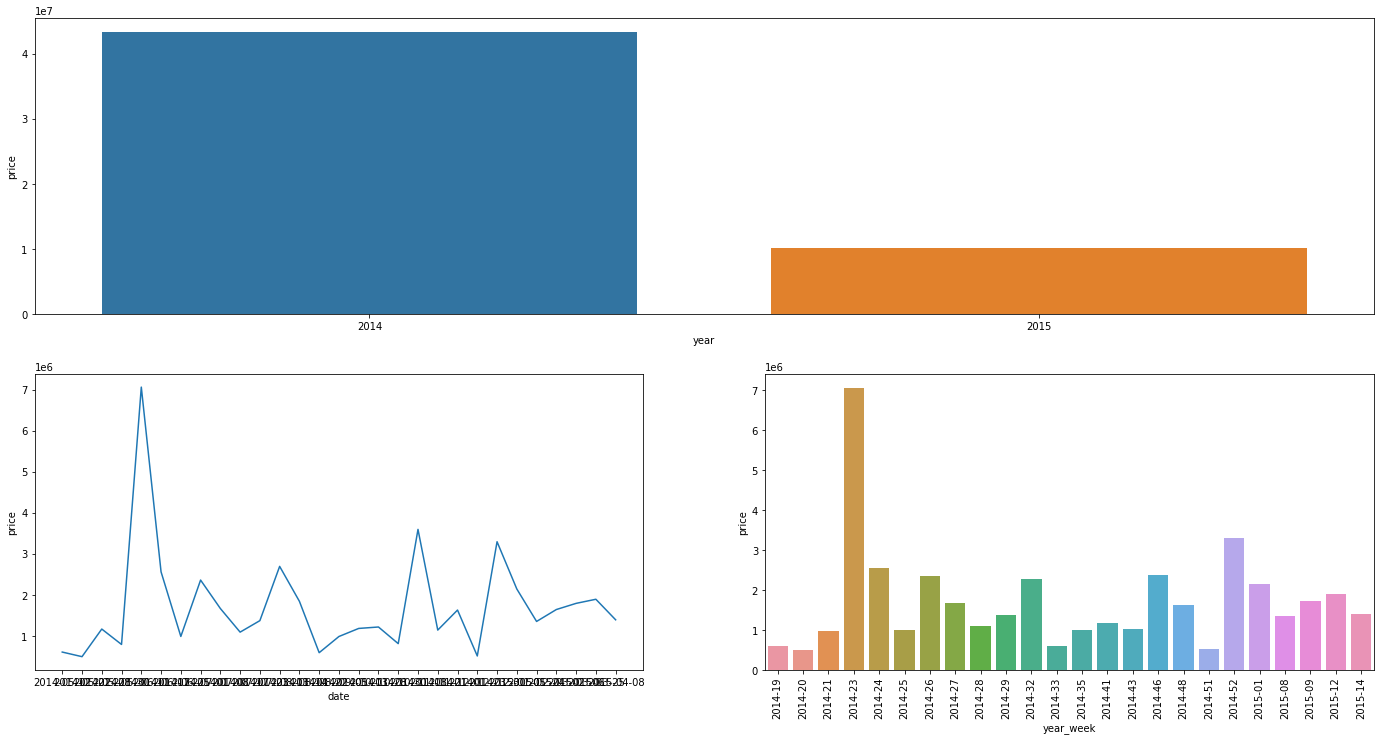

In [81]:
widgets.interactive(update_map,
                   df = fixed(df),
                   date_limit = date_limit,
                   year_limit = year_limit,
                   waterfront_limit = waterfront_limit)